In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/tensorflow 3조/data/targetData/modelFeature_01.csv") # 요일 = 월:0 일:6
df1 = df1.iloc[:,1:]
df1
# 단기체류외국인방문자수	장기체류외국인방문자수 평균기온	일강수량	최대풍속 데이터는 2018년도 데이터부터 존재

,날짜,시군구,읍면동,내국인방문자수,단기체류외국인방문자수,장기체류외국인방문자수,관광기후지수,평균기온,일강수량,최대풍속,월,요일
0,2017-01-01,서귀포시,남원읍,201792,0,0,57.30,0.0,0.0,0.0,1,6
1,2017-01-01,서귀포시,대륜동,168298,0,0,57.30,0.0,0.0,0.0,1,6
2,2017-01-01,서귀포시,대정읍,139549,0,0,57.30,0.0,0.0,0.0,1,6
3,2017-01-01,서귀포시,대천동,133527,0,0,57.30,0.0,0.0,0.0,1,6
4,2017-01-01,서귀포시,동홍동,153245,0,0,57.30,0.0,0.0,0.0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
47080,2019-12-31,제주시,조천읍,299736,4379,5279,-0.94,0.9,0.0,7.6,12,1
47081,2019-12-31,제주시,추자면,24093,784,4622,-0.94,1.7,0.0,3.1,12,1
47082,2019-12-31,제주시,한경면,68930,748,4063,-0.94,2.3,0.0,7.2,12,1
47083,2019-12-31,제주시,한림읍,197290,4240,18765,-0.94,2.3,0.0,7.2,12,1


In [4]:
df1 = df1[df1['날짜'] >= '2018-01-01'] # 2018년 데이터 부터 학습 데이터로 활용

In [5]:
df1

,날짜,시군구,읍면동,내국인방문자수,단기체류외국인방문자수,장기체류외국인방문자수,관광기후지수,평균기온,일강수량,최대풍속,월,요일
15695,2018-01-01,서귀포시,남원읍,182212,3553,2196,52.89,6.4,0.0,4.2,1,0
15696,2018-01-01,서귀포시,대륜동,196171,1348,2709,52.89,4.9,0.0,1.9,1,0
15697,2018-01-01,서귀포시,대정읍,142512,1988,5218,52.89,7.4,0.0,8.4,1,0
15698,2018-01-01,서귀포시,대천동,125315,1073,2531,52.89,5.1,0.0,2.3,1,0
15699,2018-01-01,서귀포시,동홍동,148711,1517,2493,52.89,4.9,0.0,1.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47080,2019-12-31,제주시,조천읍,299736,4379,5279,-0.94,0.9,0.0,7.6,12,1
47081,2019-12-31,제주시,추자면,24093,784,4622,-0.94,1.7,0.0,3.1,12,1
47082,2019-12-31,제주시,한경면,68930,748,4063,-0.94,2.3,0.0,7.2,12,1
47083,2019-12-31,제주시,한림읍,197290,4240,18765,-0.94,2.3,0.0,7.2,12,1


In [6]:
df2 = pd.read_csv("/content/drive/MyDrive/tensorflow 3조/data/targetData/jejuTourlist.csv")
df2 = df2.iloc[:,1:]
df2

,관광명소,분류,분류2,도,시군구,읍면동,리,지번,상세주,위도,경도,월,화,수,목,금,토,일
0,넥슨컴퓨터박물관,박물관,실내,제주,제주시,노형동,NaN,86,NXC센터,33.471803,126.484899,휴무,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00
1,이룸갤러리,미술관,실내,제주,제주시,연동,NaN,2438-10,NaN,33.494022,126.482798,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,14:00 - 21:00
2,오설록 티 뮤지엄,박물관,실내,제주,서귀포시,안덕면,서광리,1235-1,오설록,33.306090,126.289566,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00
3,제주항공우주박물관,박물관,실내,제주,서귀포시,안덕면,서광리,산39,제주항공우주박물관,33.304541,126.299772,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00
4,아르떼뮤지엄 제주,미술관,실내,제주,제주시,애월읍,어음리,1503,NaN,33.397511,126.345700,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00
5,본태박물관,박물관,실내,제주,서귀포시,안덕면,상천리,380,NaN,33.303924,126.392515,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00
6,새별오름,오름,실외,제주,제주시,애월읍,봉성리,산59-8,NaN,33.366767,126.356397,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00
7,세계자동차&피아노 박물관,박물관,실내,제주,서귀포시,안덕면,상창리,2065-04,세계자동차 제주박물관,33.283410,126.349793,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30
8,숨도,박물관,실외,제주,서귀포시,호근동,NaN,569-2,NaN,33.250635,126.536648,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00
9,건강과 성 박물관,박물관,실내,제주,서귀포시,안덕면,감산리,1736,건강과 성 박물관,33.254902,126.346939,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00


In [7]:
import matplotlib.font_manager as fm # 폰트 관련 용도
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도

In [8]:
#pyplot 한글 깨질 경우 실행, 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
# 런타임 재실 행 후 빌드
fm._rebuild()

In [9]:
# 폰트 리스트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmmi10',
 'cmb10',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmss10',
 'STIXSizeFiveSym',
 'DejaVu Sans',
 'cmex10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Serif',
 'cmtt10',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmsy10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'cmr10',
 'Liberation Sans Narrow',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumGothic',
 'Liberation Sans',
 'Humor Sans',
 'NanumSquareRound',
 'NanumMyeongjo',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Serif',
 'NanumSquare',
 'Liberation Serif',
 'NanumMyeongjo',
 'Liberation Serif',
 'Liberation Serif',
 '

In [10]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [11]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 27
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '

In [12]:
# 나눔폰트만 출력
nanum_font

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

In [13]:
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumMyeongjo


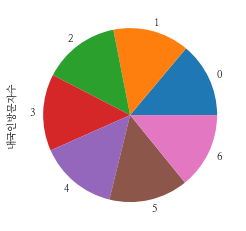

In [14]:
a = df1.groupby(['요일'])['내국인방문자수'].mean()
a.plot.pie()

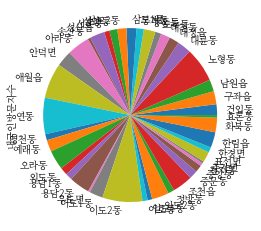

In [15]:
b = df1.groupby(['읍면동'])['내국인방문자수'].mean()
b.plot.pie()

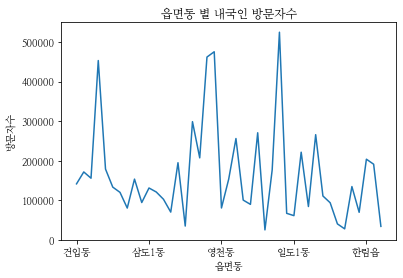

In [16]:
b = df1.groupby(['읍면동'])['내국인방문자수'].mean()
b.plot()
plt.title("읍면동 별 내국인 방문자수")
plt.xlabel("읍면동")
plt.ylabel("방문자수")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


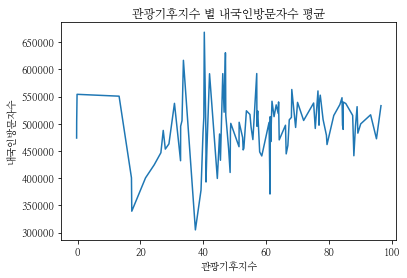

In [17]:
#c = df1.groupby(['관광기후지수'])['내국인방문자수'].mean()
c = df1[df1['읍면동']=='애월읍'][df1['요일']==5].groupby(['관광기후지수'])['내국인방문자수'].mean()
c.plot()
plt.title("관광기후지수 별 내국인방문자수 평균")
plt.xlabel("관광기후지수")
plt.ylabel("내국인방문자수")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


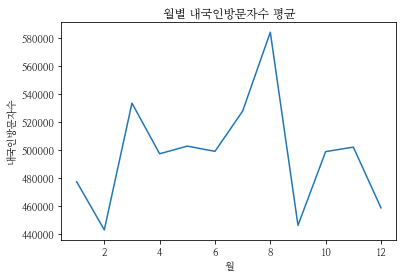

In [18]:
#c = df1.groupby(['관광기후지수'])['내국인방문자수'].mean()
d = df1[df1['읍면동']=='애월읍'][df1['요일']==5].groupby(['월'])['내국인방문자수'].mean()
d.plot()
plt.title("월별 내국인방문자수 평균")
plt.xlabel("월")
plt.ylabel("내국인방문자수")
plt.show()

In [21]:
df1['총방문자수'] = df1['내국인방문자수'] + df1['단기체류외국인방문자수'] + df1['장기체류외국인방문자수']
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,날짜,시군구,읍면동,내국인방문자수,단기체류외국인방문자수,장기체류외국인방문자수,관광기후지수,평균기온,일강수량,최대풍속,월,요일,총방문자수
15695,2018-01-01,서귀포시,남원읍,182212,3553,2196,52.89,6.4,0.0,4.2,1,0,187961
15696,2018-01-01,서귀포시,대륜동,196171,1348,2709,52.89,4.9,0.0,1.9,1,0,200228
15697,2018-01-01,서귀포시,대정읍,142512,1988,5218,52.89,7.4,0.0,8.4,1,0,149718
15698,2018-01-01,서귀포시,대천동,125315,1073,2531,52.89,5.1,0.0,2.3,1,0,128919
15699,2018-01-01,서귀포시,동홍동,148711,1517,2493,52.89,4.9,0.0,1.9,1,0,152721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47080,2019-12-31,제주시,조천읍,299736,4379,5279,-0.94,0.9,0.0,7.6,12,1,309394
47081,2019-12-31,제주시,추자면,24093,784,4622,-0.94,1.7,0.0,3.1,12,1,29499
47082,2019-12-31,제주시,한경면,68930,748,4063,-0.94,2.3,0.0,7.2,12,1,73741
47083,2019-12-31,제주시,한림읍,197290,4240,18765,-0.94,2.3,0.0,7.2,12,1,220295


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


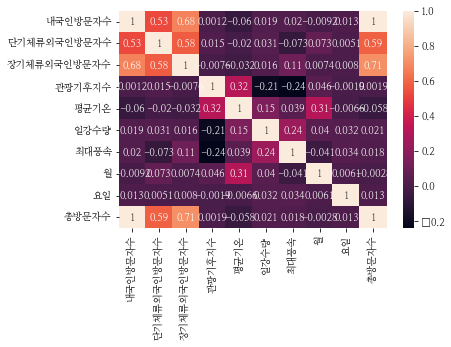

In [22]:
import seaborn as sns
sns.heatmap(df1.corr(), annot=True)

In [33]:
df1

,날짜,시군구,읍면동,내국인방문자수,단기체류외국인방문자수,장기체류외국인방문자수,관광기후지수,평균기온,일강수량,최대풍속,월,요일,총방문자수
15695,2018-01-01,서귀포시,남원읍,182212,3553,2196,52.89,6.4,0.0,4.2,1,0,187961
15696,2018-01-01,서귀포시,대륜동,196171,1348,2709,52.89,4.9,0.0,1.9,1,0,200228
15697,2018-01-01,서귀포시,대정읍,142512,1988,5218,52.89,7.4,0.0,8.4,1,0,149718
15698,2018-01-01,서귀포시,대천동,125315,1073,2531,52.89,5.1,0.0,2.3,1,0,128919
15699,2018-01-01,서귀포시,동홍동,148711,1517,2493,52.89,4.9,0.0,1.9,1,0,152721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47080,2019-12-31,제주시,조천읍,299736,4379,5279,-0.94,0.9,0.0,7.6,12,1,309394
47081,2019-12-31,제주시,추자면,24093,784,4622,-0.94,1.7,0.0,3.1,12,1,29499
47082,2019-12-31,제주시,한경면,68930,748,4063,-0.94,2.3,0.0,7.2,12,1,73741
47083,2019-12-31,제주시,한림읍,197290,4240,18765,-0.94,2.3,0.0,7.2,12,1,220295


In [46]:
# 관광지 리스트에서 유니크한 동 추출 : 28건
a = df2.groupby('읍면동').count()
a = a.reset_index(level=['읍면동'])
a = t['읍면동']
a  

0      건입동
1      구좌읍
2      남원읍
3      노형동
4      대정읍
5      대포동
6      상예동
7      색달동
8      서홍동
9      성산읍
10     신효동
11    아라1동
12     안덕면
13     애월읍
14      연동
15     오등동
16    용담1동
17    용담이동
18    용담일동
19     우도면
20     월평동
21    일도이동
22     조천읍
23     표선면
24     한경면
25     한림읍
26     해안동
27     호근동
Name: 읍면동, dtype: object

In [60]:
target = pd.merge(a,df1, how='inner', on= ['읍면동'])

In [80]:
t = (target.groupby("읍면동").count()).reset_index(level=['읍면동'])['읍면동'] # 16건bb

In [81]:
dong = []
for i in t:
  dong.append(i)

len(dong)

16

In [90]:
target = target[['날짜','읍면동','관광기후지수','평균기온','일강수량','최대풍속','월','요일','총방문자수']]

In [94]:
target['날짜'] = pd.to_datetime(target['날짜'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
target.dtypes # 날짜를 datetime64[ns] 으로 바꿔 주어야 pyplot 에서 제대로 찍힘

날짜        datetime64[ns]
읍면동               object
관광기후지수           float64
평균기온             float64
일강수량             float64
최대풍속             float64
월                  int64
요일                 int64
총방문자수              int64
dtype: object

In [97]:
target['연도'] = target.날짜.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
target
#target.to_csv("/content/drive/MyDrive/tensorflow 3조/data/targetData/modelFeature_02.csv")

In [100]:
# 시계열 데이터
daily_tour = target.groupby('날짜', as_index=False)['총방문자수'].sum()
daily_dong_tour = target.groupby(['날짜','읍면동'], as_index=False)['총방문자수'].sum()

Text(0, 0.5, '총방문자수')

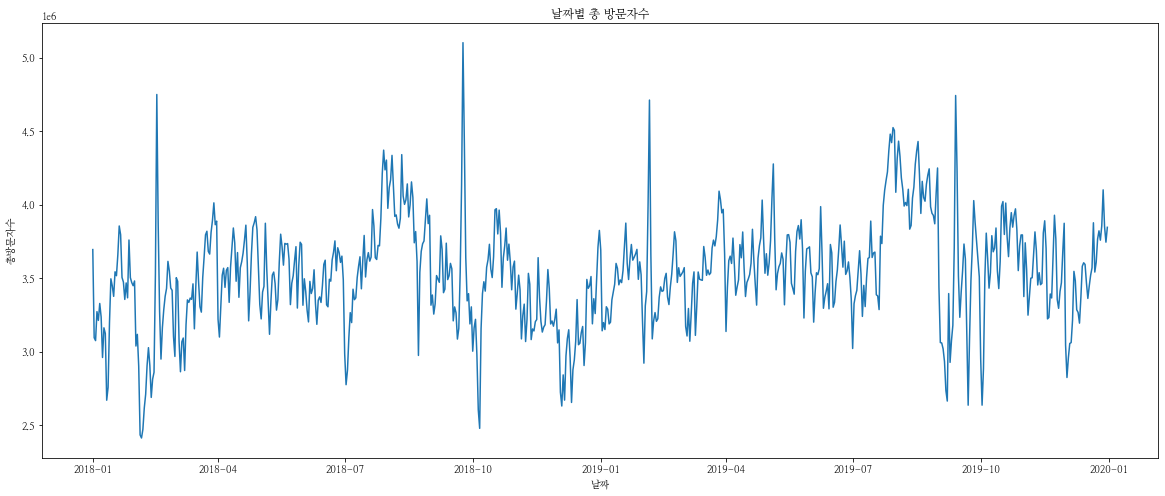

In [104]:
plt.figure(figsize=(20,8))
plt.plot(daily_tour['날짜'],daily_tour['총방문자수'])
plt.title('날짜별 총 방문자수')
plt.xlabel('날짜')
plt.ylabel('총방문자수')

In [105]:
daily_dong_tour

,날짜,읍면동,총방문자수
0,2018-01-01,건입동,176759
1,2018-01-01,구좌읍,231530
2,2018-01-01,남원읍,187961
3,2018-01-01,노형동,411056
4,2018-01-01,대정읍,149718
...,...,...,...
11675,2019-12-31,우도면,10471
11676,2019-12-31,조천읍,309394
11677,2019-12-31,표선면,142795
11678,2019-12-31,한경면,73741


In [106]:
dong

['건입동',
 '구좌읍',
 '남원읍',
 '노형동',
 '대정읍',
 '서홍동',
 '성산읍',
 '안덕면',
 '애월읍',
 '연동',
 '용담1동',
 '우도면',
 '조천읍',
 '표선면',
 '한경면',
 '한림읍']

건입동
구좌읍
남원읍
노형동
대정읍
서홍동
성산읍
안덕면
애월읍
연동
용담1동
우도면
조천읍
표선면
한경면
한림읍


Text(0, 0.5, '총방문자수')

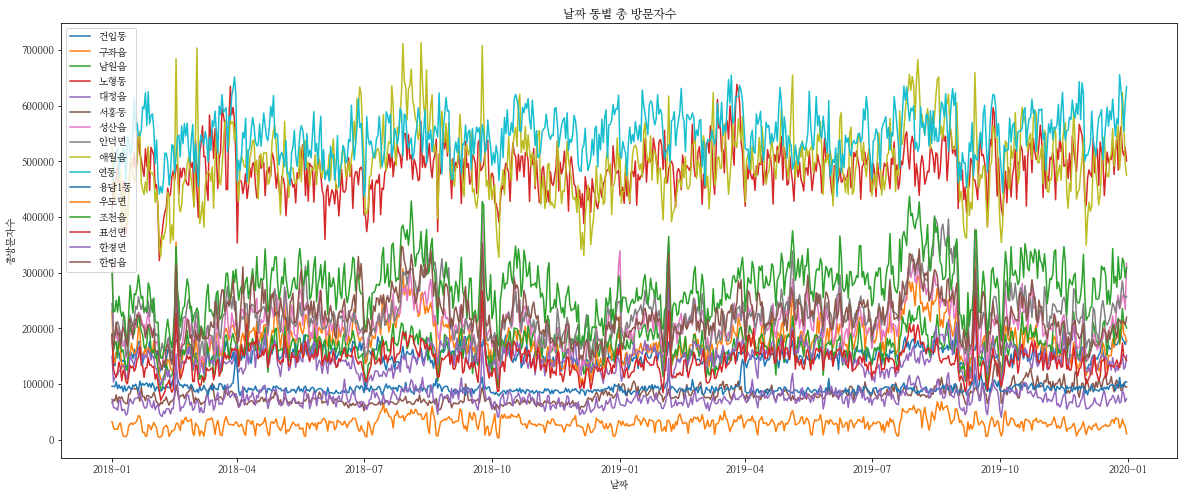

In [107]:
plt.figure(figsize=(20,8))

for i in range(len(dong)):
  df = daily_dong_tour[daily_dong_tour['읍면동']==dong[i]]
  print(dong[i])
  plt.plot(df['날짜'], df['총방문자수'],label=dong[i])

plt.legend()
plt.title('날짜 동별 총 방문자수')
plt.xlabel('날짜')
plt.ylabel('총방문자수')
# 월별, 동별로 비슷

In [ ]:
import folium

In [ ]:
map = folium.Map(location = [33.371058,126.570421], zoom_start =10)

In [ ]:
tooltip = "추천"
folium.Marker([33.371058, 126.570421], popup = '<i>추천</i>', tooltip =tooltip).add_to(map)

In [ ]:
map